In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
from scipy.stats import linregress

from sigmalypse.main import MetricsLab
from sigmalypse.main import MeasureBOda

In [2]:
df_tracker = pd.read_csv("data/tracker.csv", usecols=['t', 'x', 'y'])
df_tracker.head()

,t,x,y
0,0.000000,0.000144,0.000246
1,0.033480,-0.009313,0.000295
2,0.066959,-0.018081,0.001692
3,0.100439,-0.026997,0.001872
4,0.133919,-0.036958,0.004577


In [3]:
df_tracker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910 entries, 0 to 1909
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       1910 non-null   float64
 1   x       1910 non-null   float64
 2   y       1910 non-null   float64
dtypes: float64(3)
memory usage: 44.9 KB


Text(0, 0.5, 'Distancia (m)')

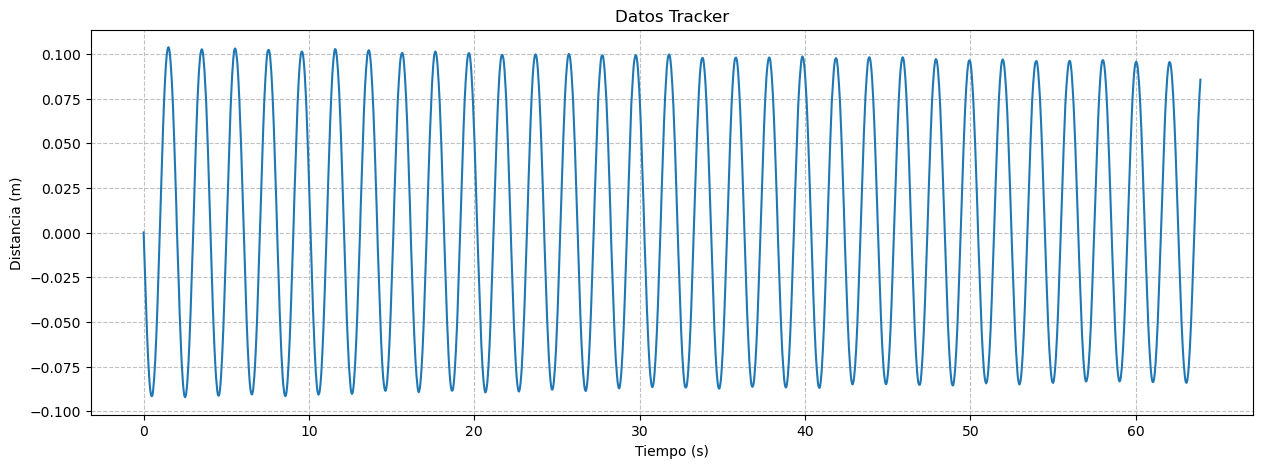

In [4]:
plt.figure(figsize=(15, 5))
plt.plot(df_tracker['t'], df_tracker['x'])

plt.title("Datos Tracker")
plt.grid(True, color='silver', linestyle='--', linewidth=0.8)
plt.xlabel("Tiempo (s)")
plt.ylabel("Distancia (m)")

In [5]:
# Cargar el DataFrame, omitiendo la columna vacía
df_tracker = pd.read_csv("data/tracker.csv", usecols=['t', 'x', 'y'])

# Convertir las columnas a arrays de NumPy
t_arr = df_tracker['t'].to_numpy()
x_arr = df_tracker['x'].to_numpy()

# Calcular el valor medio de la señal para definir el punto medio (puedes usar 0 si la señal está centrada)
mid_val = np.mean(x_arr)

# Detectar los cruces ascendentes: donde la señal pasa de estar por debajo a estar por encima del valor medio
crossings = np.where((x_arr[:-1] < mid_val) & (x_arr[1:] >= mid_val))[0]

# Seleccionar el intervalo entre el primer cruce y el cruce número 31 (30 períodos completos)
t_start = t_arr[crossings[0]]
t_end = t_arr[crossings[31]]

# Cortar el DataFrame usando el intervalo de tiempo definido
df_30 = df_tracker[(df_tracker['t'] >= t_start) & (df_tracker['t'] <= t_end)]

In [6]:
t = df_30['t'].values
x = df_30['x'].values

# Calcular los cruces por 0 de forma precisa mediante interpolación lineal
zero_crossings = []
for i in range(len(x) - 1):
    if x[i] < 0 and x[i+1] >= 0:
        # Interpolación lineal para hallar el instante exacto en que x cruza 0
        t_cross = t[i] + (t[i+1] - t[i]) * (-x[i]) / (x[i+1] - x[i])
        zero_crossings.append(t_cross)
zero_crossings = np.array(zero_crossings)

# Omitir el primer cruce (ya que no cuenta) y conservar el resto
if zero_crossings.size > 0:
    zero_crossings = zero_crossings[1:]

# Reducir el intervalo: desde el primer cruce (después de omitir el primero) hasta el último
if zero_crossings.size > 0:
    t_interval_start = zero_crossings[0]
    t_interval_end = zero_crossings[-1]
else:
    t_interval_start = t[0]
    t_interval_end = t[-1]

# Crear un DataFrame reducido usando el intervalo definido
df_reduced = df_tracker[(df_tracker['t'] >= t_interval_start) & (df_tracker['t'] <= t_interval_end)]

# Filtrar los cruces que se encuentran dentro del intervalo reducido
zc_in_interval = zero_crossings[(zero_crossings >= t_interval_start) & (zero_crossings <= t_interval_end)]

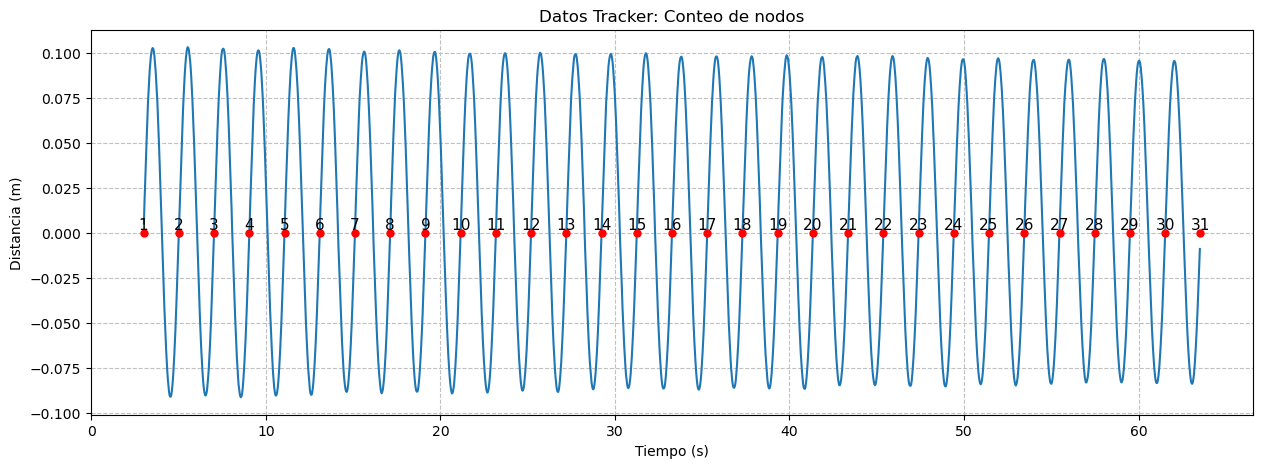

In [14]:
# Graficar la señal en el intervalo reducido y marcar (con numeración) los cruces por 0
plt.figure(figsize=(15, 5))
plt.plot(df_reduced['t'], df_reduced['x'])

for i, tzc in enumerate(zc_in_interval):
    plt.plot(tzc, 0, 'ro', markersize=5)
    plt.text(tzc, 0, f'{i+1}', fontsize=11,  ha='center', va='bottom')

plt.title("Datos Tracker: Conteo de nodos")
plt.grid(True, color='silver', linestyle='--', linewidth=0.8)
plt.xlabel("Tiempo (s)")
plt.ylabel("Distancia (m)")
plt.show()

In [10]:
periods = np.diff(zc_in_interval)

# Mostrar los períodos de oscilación
print("Los períodos de oscilación (duraciones) son:")
for i, period in enumerate(periods, start=1):
    print(f"Periodo {i}: {period:.4f} s")

Los períodos de oscilación (duraciones) son:
Periodo 1: 2.0165 s
Periodo 2: 2.0206 s
Periodo 3: 2.0217 s
Periodo 4: 2.0128 s
Periodo 5: 2.0187 s
Periodo 6: 2.0172 s
Periodo 7: 2.0203 s
Periodo 8: 2.0186 s
Periodo 9: 2.0193 s
Periodo 10: 2.0186 s
Periodo 11: 2.0157 s
Periodo 12: 2.0199 s
Periodo 13: 2.0186 s
Periodo 14: 2.0169 s
Periodo 15: 2.0210 s
Periodo 16: 2.0166 s
Periodo 17: 2.0158 s
Periodo 18: 2.0196 s
Periodo 19: 2.0190 s
Periodo 20: 2.0160 s
Periodo 21: 2.0188 s
Periodo 22: 2.0192 s
Periodo 23: 2.0162 s
Periodo 24: 2.0189 s
Periodo 25: 2.0192 s
Periodo 26: 2.0182 s
Periodo 27: 2.0148 s
Periodo 28: 2.0202 s
Periodo 29: 2.0199 s
Periodo 30: 2.0179 s


In [15]:
df_le = pd.read_csv("data/instrumentos.csv")

,fotocompuerta,cronometro
0,2.016,2.12
1,2.016,2.22
2,2.017,1.97
3,2.017,2.09
4,2.016,2.03
5,2.016,2.07
6,2.016,1.94
7,2.016,2.09
8,2.015,1.97
9,2.016,1.94


In [17]:
df_le["tracker"] = periods
df_le["tracker"] = df_le["tracker"].round(3)
df_le

,fotocompuerta,cronometro,tracker
25,2.015,1.97,2.018
26,2.016,2.00,2.015
27,2.014,2.00,2.020
28,2.016,1.96,2.020
29,2.014,2.12,2.018


In [18]:
df_le.to_csv("data/instrumentos.csv", index=False)

In [22]:
lab = MetricsLab(units={"L": "cm", "M": "g", "T": "s"})
lab.add_table_from_csv("data/instrumentos.csv", name="instrumentos", units={"fotocompuerta": "s", "cronometro": "s", "tracker": "s"})
lab.add_table_from_csv("data/gravedad.csv", name="gravedad", units={"g=24.5-24.3": "s"})
lab.add_table_from_csv("data/variacion_altura.csv", name="altura", units={
    "2m": "s",
    "1.9m": "s",
    "1.8m": "s",
    "1.7m": "s",
    "1.6m": "s",
    "1.5m": "s",
    "1.4m": "s",
    "1.3m": "s",
    "1.2m": "s",
    "1.1m": "s"
})

Tabla 'instrumentos' añadida exitosamente.
Tabla 'gravedad' añadida exitosamente.
Tabla 'altura' añadida exitosamente.


In [23]:
for key, table in lab.tables.items():
    print(key)
    print(table)

instrumentos
{'data':     fotocompuerta  cronometro  tracker
0           2.016        2.12    2.017
1           2.016        2.22    2.021
2           2.017        1.97    2.022
3           2.017        2.09    2.013
4           2.016        2.03    2.019
5           2.016        2.07    2.017
6           2.016        1.94    2.020
7           2.016        2.09    2.019
8           2.015        1.97    2.019
9           2.016        1.94    2.019
10          2.016        2.06    2.016
11          2.016        2.00    2.020
12          2.016        2.00    2.019
13          2.015        2.03    2.017
14          2.016        2.03    2.021
15          2.015        2.12    2.017
16          2.016        2.06    2.016
17          2.017        1.97    2.020
18          2.016        1.94    2.019
19          2.012        2.06    2.016
20          2.016        1.97    2.019
21          2.013        1.94    2.019
22          2.015        2.18    2.016
23          2.014        1.97    2.019
24 